In [3]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
## from google.colab import files
## upload = files.upload()

In [5]:
df = yf.Ticker('BTC-USD')
df = df.history('90d')

In [6]:
#df = pd.read_csv("AARTIIND.csv")
#df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-05-24,29101.125000,29774.355469,28786.589844,29655.585938,26616506245,0,0
2022-05-25,29653.134766,30157.785156,29384.949219,29562.361328,27525063551,0,0
2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,36774325352,0,0
2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,36582005748,0,0
2022-05-28,28625.187500,28899.552734,28569.187500,28792.617188,30815633408,0,0


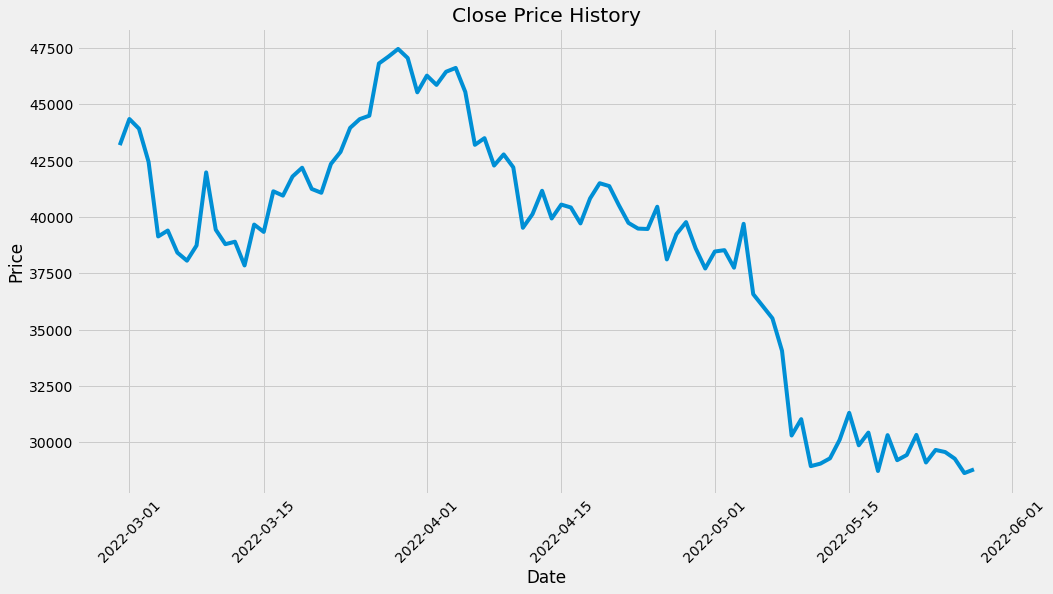

In [7]:
plt.figure(figsize=(15,8))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [8]:
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()

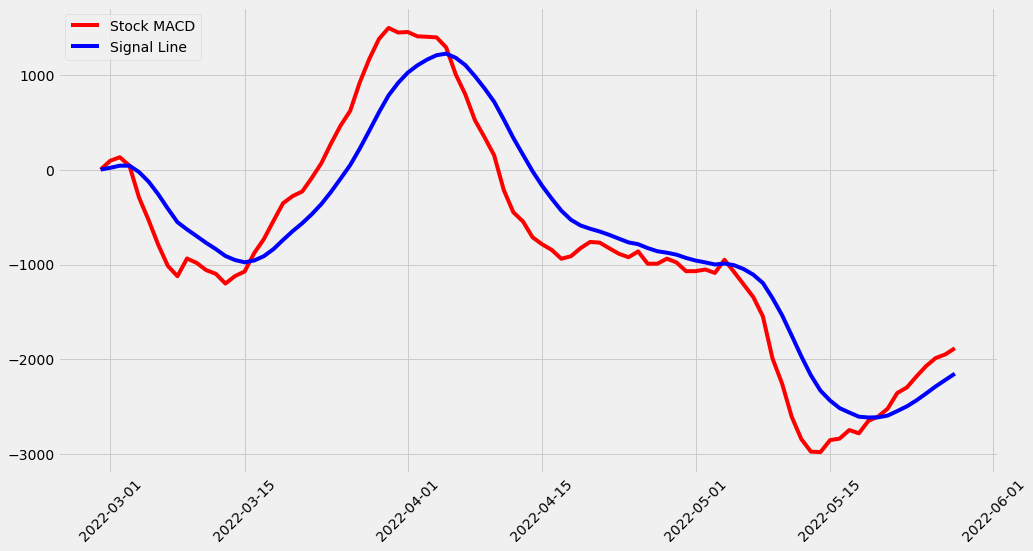

In [9]:
plt.figure(figsize=(15, 8))
plt.plot(df.index, MACD, label= 'Stock MACD', color ='red')
plt.plot(df.index, signal, label='Signal Line', color='blue')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [10]:
df['MACD'] = MACD
df['Signal Line'] = signal
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal Line
Date,,,,,,,,,
2022-02-28,37706.000000,43760.457031,37518.214844,43193.234375,35690014104,0,0,0.000000,0.000000
2022-03-01,43194.503906,44793.601562,42952.585938,44354.636719,32479047645,0,0,92.647480,18.529496
2022-03-02,44357.617188,45077.578125,43432.851562,43924.117188,29183112630,0,0,129.835288,40.790654
2022-03-03,43925.195312,44021.578125,41914.750000,42451.789062,24967782593,0,0,40.040753,40.640674
2022-03-04,42458.140625,42479.613281,38805.847656,39137.605469,28516271427,0,0,-295.146713,-26.516803


In [11]:
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal['Close'][i])
                flag = 1
            else:
                Buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal['Close'][i])
                flag = 0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
    return (Buy, Sell)

In [12]:
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [13]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,,
2022-02-28,37706.000000,43760.457031,37518.214844,43193.234375,35690014104,0,0,0.000000,0.000000,NaN,NaN
2022-03-01,43194.503906,44793.601562,42952.585938,44354.636719,32479047645,0,0,92.647480,18.529496,44354.636719,NaN
2022-03-02,44357.617188,45077.578125,43432.851562,43924.117188,29183112630,0,0,129.835288,40.790654,NaN,NaN
2022-03-03,43925.195312,44021.578125,41914.750000,42451.789062,24967782593,0,0,40.040753,40.640674,NaN,42451.789062
2022-03-04,42458.140625,42479.613281,38805.847656,39137.605469,28516271427,0,0,-295.146713,-26.516803,NaN,NaN


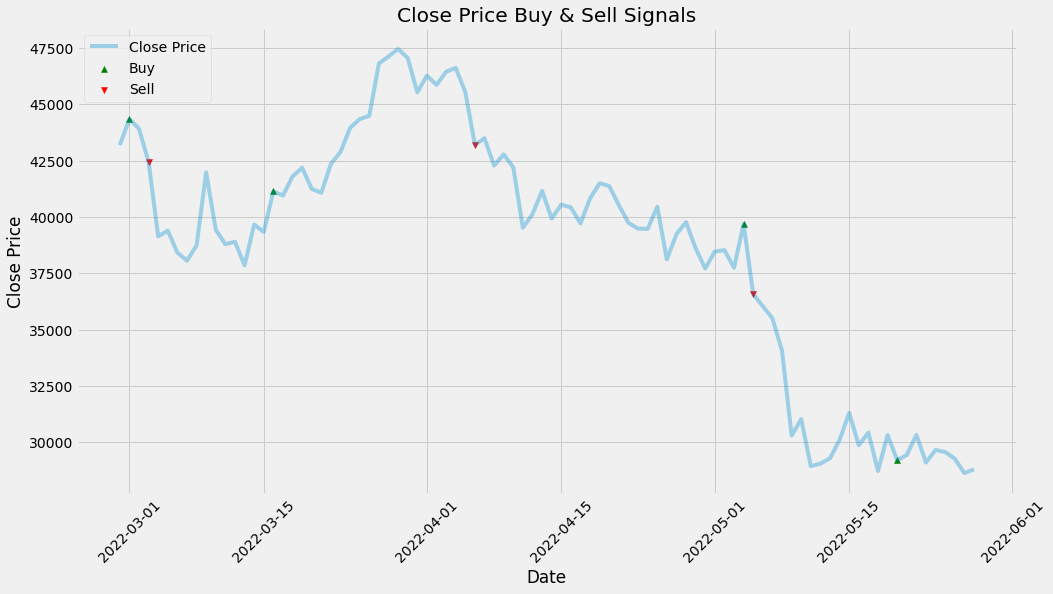

In [14]:
plt.figure(figsize=(15, 8))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha=0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Close Price')
plt.legend(loc = 'upper left')
plt.show()